# Classification 


<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Iris Setosa" style="width: 200px;"/>
Iris Setosa
<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg"  alt="Iris Versicolor" style="width: 200px;"/>
Iris Versicolor
<img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg" alt="Iris Virginica" style="width: 200px;"/>
Iris Viginica

In [1]:
import seaborn
import pandas


iris_dataframe = pandas.read_csv("Iris.csv", dtype={"species": "category"})
color_map = {"setosa": "#e41a1c", "versicolor": "#377eb8", "virginica": "#4daf4a"}
label_map = {"setosa": 1, "versicolor": 2, "virginica": 3}
iris_dataframe["label"] = iris_dataframe.apply(lambda row: label_map[row["species"]], axis = 1)
iris_dataframe["plot_color"] = iris_dataframe.apply(lambda row: color_map[row["species"]], axis = 1)
iris_dataframe


,sepal_length,sepal_width,petal_length,petal_width,species,label,plot_color
0,5.1,3.5,1.4,0.2,setosa,1,#e41a1c
1,4.9,3.0,1.4,0.2,setosa,1,#e41a1c
2,4.7,3.2,1.3,0.2,setosa,1,#e41a1c
3,4.6,3.1,1.5,0.2,setosa,1,#e41a1c
4,5.0,3.6,1.4,0.2,setosa,1,#e41a1c
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3,#4daf4a
146,6.3,2.5,5.0,1.9,virginica,3,#4daf4a
147,6.5,3.0,5.2,2.0,virginica,3,#4daf4a
148,6.2,3.4,5.4,2.3,virginica,3,#4daf4a


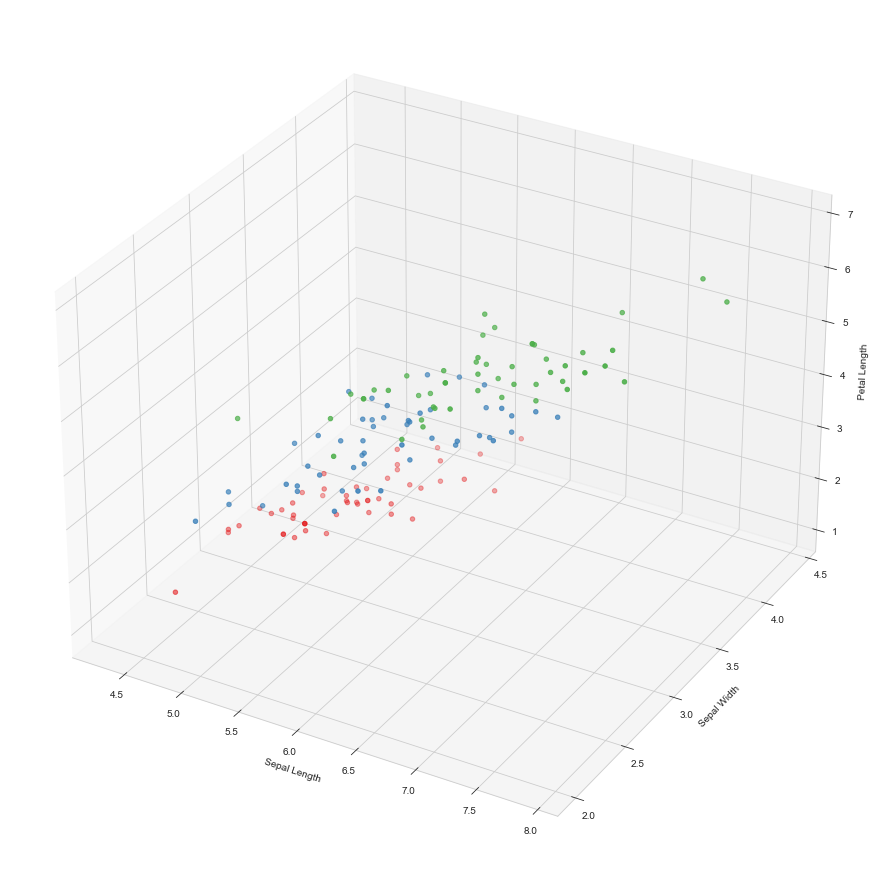

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

seaborn.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(12,12))

ax = Axes3D(fig) 

ax.scatter(iris_dataframe.sepal_length, iris_dataframe.sepal_width, iris_dataframe.petal_length, c=iris_dataframe.plot_color, marker='o')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.show()

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split


feature_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
features = iris_dataframe[feature_columns].values.reshape(-1, len(feature_columns))
labels = iris_dataframe["label"]
# X_train, X_test, y_train, y_test
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=0)
#model = GaussianNB(priors = None)
#model = DecisionTreeClassifier
model = SGDClassifier()
model.fit(features_train, labels_train)
predictions = model.predict(features_test)
species_map = {1: "setosa", 2: "versicolor", 3: "virginica"}
accuracy = sum([1.0 if pred == actual else 0.0 for pred, actual in zip(predictions, labels_test)]) / len(predictions) * 100
print(f"Accuracy: {accuracy:.2f}%")
pandas.DataFrame({'Actual': labels_test, 'Predicted': predictions}).replace(species_map)

Accuracy: 60.00%


,Actual,Predicted
114,virginica,virginica
62,versicolor,versicolor
33,setosa,setosa
107,virginica,virginica
7,setosa,setosa
100,virginica,virginica
40,setosa,setosa
86,versicolor,setosa
76,versicolor,setosa
71,versicolor,setosa
